<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/batch_norm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive

drive.mount('/content/drive')

#df = pd.read_csv('placement.csv')
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/concertriccir2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


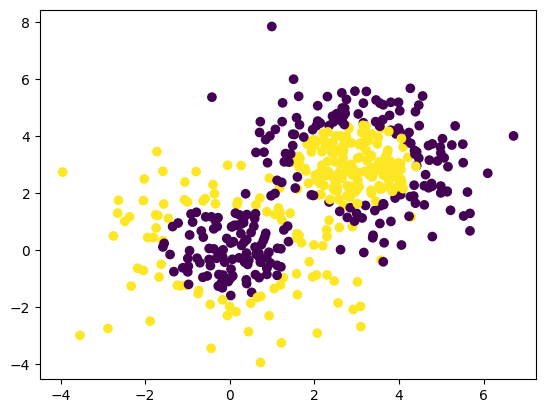

In [29]:
plt.scatter(df['X'],df['Y'], c = df['class'])

In [15]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [31]:
model = Sequential()

model.add(Dense(2,activation='relu', input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 2)                 6         
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history1= model.fit(X,Y,epochs=200, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 12ms/step - loss: 0.9224 - accuracy: 0.4700 - val_loss: 0.8105 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8815 - accuracy: 0.4525 - val_loss: 0.7673 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.4500 - val_loss: 0.7331 - val_accuracy: 0.5700
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8202 - accuracy: 0.4350 - val_loss: 0.7069 - val_accuracy: 0.5600
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7983 - accuracy: 0.4350 - val_loss: 0.6880 - val_accuracy: 0.5500
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7797 - accuracy: 0.4400 - val_loss: 0.6744 - val_accuracy: 0.5500
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7659 - accuracy: 0.4425 - val_loss: 0.6640 - val_accuracy: 0.5300
Epoch 8/200


In [34]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization_4 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_5 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history2 = model.fit(X,Y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 14ms/step - loss: 0.6977 - accuracy: 0.5400 - val_loss: 0.7009 - val_accuracy: 0.5200
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.6966 - val_accuracy: 0.5300
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5400 - val_loss: 0.6933 - val_accuracy: 0.5500
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.5675 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6774 - accuracy: 0.5600 - val_loss: 0.6899 - val_accuracy: 0.5500
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.5375 - val_loss: 0.6887 - val_accuracy: 0.5600
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5425 - val_loss: 0.6880 - val_accuracy: 0.5600
Epoch 8/200


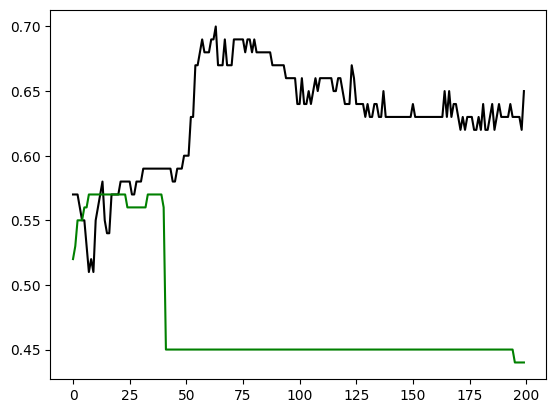

In [37]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')